In [21]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

# Read the City and Ride Data
city_csv = pd.read_csv(city_data_to_load)
ride_csv = pd.read_csv(ride_data_to_load)

# Combine the data into a single dataset
city_ride_merged = pd.merge(ride_csv, city_csv, how = 'left', on = ['city', 'city'])

# Display the data table for preview
city_ride_merged.head()


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

<function matplotlib.pyplot.show(*args, **kw)>

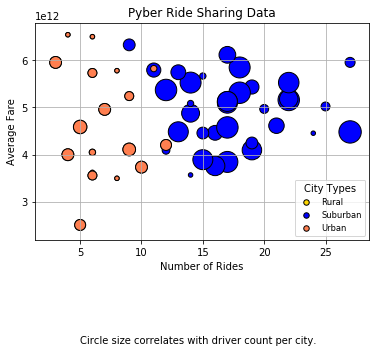

In [38]:
# Obtain the x and y coordinates for each of the three city types
rural_type = city_ride_merged[city_ride_merged["type"] == 'Rural']
suburban_type = city_ride_merged[city_ride_merged["type"] == 'Suburban']
urban_type = city_ride_merged[city_ride_merged["type"] == 'Urban']

rural_rides_count = rural_type.groupby(['city']).count()['ride_id']
rural_driver_avg = rural_type.groupby(['city']).mean()['driver_count'] 
rural_rides_avg = rural_type.groupby(['city']).mean()['ride_id'] 

suburban_rides_count = suburban_type.groupby(['city']).count()['ride_id']
suburban_driver_avg = suburban_type.groupby(['city']).mean()['driver_count'] 
suburban_rides_avg = suburban_type.groupby(['city']).mean()['ride_id'] 

urban_rides_count = urban_type.groupby(['city']).count()['ride_id']
urban_driver_avg = urban_type.groupby(['city']).mean()['driver_count'] 
urban_rides_avg = urban_type.groupby(['city']).mean()['ride_id'] 


# Build the scatter plots for each city types
plt.scatter(rural_rides_count, rural_rides_avg, s=20*rural_driver_avg, marker="o", facecolors="gold", edgecolors="black",
            label = 'Rural')
                              
plt.scatter(suburban_rides_count, suburban_rides_avg, s=20*suburban_driver_avg, marker="o", facecolors="blue", edgecolors="black",
            label = 'Suburban')
                              
plt.scatter(rural_rides_count, rural_rides_avg, s=20*rural_driver_avg, marker="o", facecolors="coral", edgecolors="black",
            label = 'Urban')
                              
                              
# Incorporate the other graph properties
plt.title("Pyber Ride Sharing Data")
plt.ylabel("Average Fare")
plt.xlabel("Number of Rides")
plt.grid(True)
# Create a legend
lgnd = plt.legend(fontsize="small", mode="Expanded", 
                  numpoints=1, scatterpoints=1, 
                  loc="best", title="City Types", 
                  labelspacing=0.5)
lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# Incorporate a text label regarding circle size
plt.text(5, 5, "Circle size correlates with driver count per city.")
# Save Figure
#plt.savefig("image/PyberRideSharind.png")
plt.show


## Total Fares by City Type

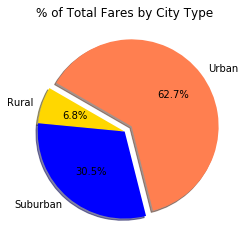

In [47]:
# Calculate Type Percents
type_percent = 100 * city_ride_merged.groupby(["type"]).sum()["fare"] / city_ride_merged["fare"].sum()

# Build Pie Chart
plt.pie(type_percent, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "blue", "coral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Fares by City Type")

# Save Figure
#plt.savefig("image/FaresByCityType.png")
plt.show()


## Total Drivers by City Type

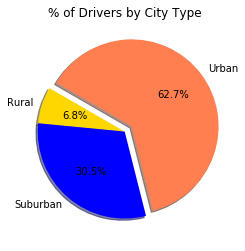

In [48]:
# Calculate Type Percents
driver_percent = 100 * city_ride_merged.groupby(["type"]).sum()["driver_count"] / city_ride_merged["driver_count"].sum()

# Build Pie Chart
plt.pie(type_percent, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "blue", "coral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Drivers by City Type")

# Save Figure
#plt.savefig("image/DriverByCityType.png")
plt.show()

In [49]:
# Show Figure
plt.show()

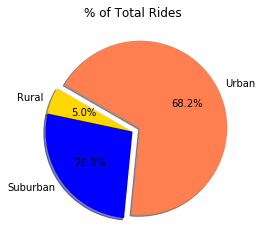

In [50]:
# Calculate Type Percents
type_percent = 100 * city_ride_merged.groupby(["type"]).sum()["ride_id"] / city_ride_merged["ride_id"].sum()

# Build Pie Chart
plt.pie(type_percent, 
        labels=["Rural", "Suburban", "Urban"], 
        colors=["gold", "blue", "coral"], 
        explode=[0, 0, 0.1], 
        autopct='%1.1f%%', 
        shadow=True, startangle=150)
plt.title("% of Total Rides")

# Save Figure
#plt.savefig("image/TotalRidesPie.png")
plt.show()